In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.backends.backend_pdf import PdfPages
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from hotellings_tsqare import hotellings_tsqare,bootstrap_limit # hotellings_tsqare 파일 import

In [2]:
path = "C:/Users/User/github/Anomaly-Detection/data/"
df1 = pd.read_csv(path + "ph1.csv", encoding = 'CP949') # 정상 학습 데이터
df2 = pd.read_csv(path + "ph2.csv", encoding = 'CP949') # 정상 테스트
df3 = pd.read_csv(path + "ph2_out.csv", encoding = 'CP949') # 비정상 테스트

In [3]:
df = df1.iloc[:,7:49]
#df_1 = pd.concat([df1.iloc[:,0], df], axis=1)
#df = df_1

In [4]:
df.head(1)

,MP_ALLSTEP.INNER_TEMP.Mean,MP_ALLSTEP.INNER_TEMP.Stdev,MP_ALLSTEP.OUTER_TEMP.Mean,MP_ALLSTEP.OUTER_TEMP.Stdev,MP_ALLSTEP.WALLHTR_TEMP1.Mean,MP_ALLSTEP.WALLHTR_TEMP1.Stdev,MP_STEP1_First10sec.PC_PRESSURE.Area,MP_STEP1_First10sec.PC_PRESSURE.Min,MP_STEP3.MATCHER_VDC.Mean,MP_STEP3.MATCHER_VDC.Stdev,...,MP_STEP4.PC_TV_ANGLE.Stdev,MP_STEP4.RFGEN_FORWARD.Mean,MP_STEP4.RFGEN_FORWARD.Stdev,MP_STEP4.SIH4_FLOW.Mean,MP_STEP4.SIH4_FLOW.Stdev,MP_STEP4_No_Shift.RFGEN_REFLECT.Max,MP_STEP5_to_Last_PWR_Lift.RFGEN_REFLECT.Max,MP_STEP4.EI2.Max,MP_STEP4.EI3.Max,MP_STEP4.EI4.Max
0,339.4905,0.5003,359.1997,0.4001,135.0,0.0,0.0993,0.003,35.5,0.5055,...,0.0596,22744.9012,2.8132,6784.9612,3.4718,224.8672,910.9443,101.18,100.73,100.73


In [ ]:
# 변수별 plot
# for i in range(df.shape[1]):
#     fig = sns.displot(df.iloc[:,i])
#     plt.savefig('img_{}'.format(i))
# plt.close()

## PCA

In [5]:
cov_df = np.corrcoef(df)
cov_df

array([[1.        , 0.9999577 , 0.99999146, ..., 0.9999585 , 0.99996114,
        0.99999323],
       [0.9999577 , 1.        , 0.99995732, ..., 0.99999893, 0.99999939,
        0.99995045],
       [0.99999146, 0.99995732, 1.        , ..., 0.99995513, 0.99995814,
        0.99999912],
       ...,
       [0.9999585 , 0.99999893, 0.99995513, ..., 1.        , 0.9999998 ,
        0.99994913],
       [0.99996114, 0.99999939, 0.99995814, ..., 0.9999998 , 1.        ,
        0.99995231],
       [0.99999323, 0.99995045, 0.99999912, ..., 0.99994913, 0.99995231,
        1.        ]])

In [92]:
img = plt.matshow(cov_df, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_df.shape[0]):
    for y in range(cov_df.shape[1]):
        plt.text(x, y, "%0.2f" % cov_df[x,y], size=30, color='black', ha="center", va="center")
        
plt.show()

In [6]:
x = df
y = df1.iloc[:,1]

In [7]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]

        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [8]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(x)

In [9]:
pca = convers_pca(no_of_components=3)
pca.fit(transformed)

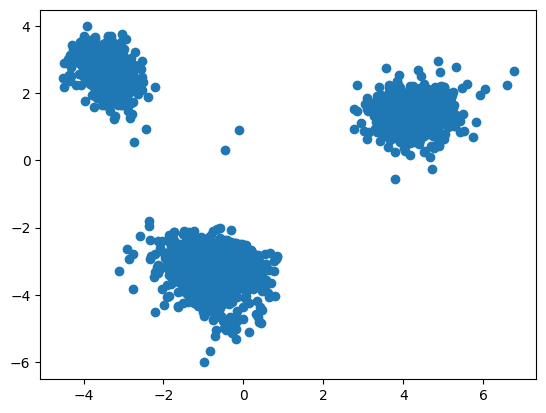

In [10]:
x_std = pca.transform(transformed)

plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1])

In [21]:
sns.set_style('whitegrid')

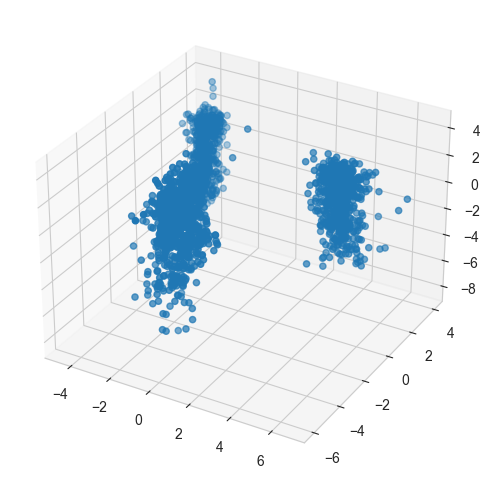

In [26]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_std[:, 0], x_std[:, 1], x_std[:, 2])
plt.show()

array([ 0.27331067, -2.94641054,  0.98253789, ...,  1.89728226,
       -0.62696505,  0.49387551])